In [18]:
%store -r EN_Des

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import time
import seaborn as sns
import matplotlib.patheffects as PathEffects
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,rc={"lines.linewidth": 2.5})

import nbimporter
from NDE_Time_Series_Problem import fashion_scatter
from Proof_of_Concept_KG import Print_Cluster

%store -r Final_Data_Set_Nor
%store -r EN_Des

In [3]:
print(list(EN_Des.items())[:1])

[('e809884c-8121-52f8-806c-6d1b86adae2e', {'Sector': '511210', 'Description': 'Forescout Technologies, Inc. provides device visibility and control solution', 'Description Emb': array([[ 5.7600e-01,  7.7410e-01,  8.9120e-01,  7.5210e-01,  1.1872e+00,
         6.7610e-01,  2.7440e-01,  1.0162e+00,  8.5640e-01,  6.3140e-01,
         4.3880e-01,  2.7280e-01,  7.2570e-01,  1.8619e+00,  5.3800e-01,
         1.2024e+00,  2.8100e-01,  9.9480e-01,  5.8390e-01,  6.9910e-01,
         4.3010e-01,  4.7800e-02,  7.4360e-01,  1.4881e+00,  9.0410e-01,
         6.2760e-01,  2.2730e-01,  3.8470e-01,  2.5190e-01,  8.9040e-01,
         7.7160e-01,  9.8240e-01,  9.1970e-01,  4.1410e-01,  5.5550e-01,
         3.5180e-01,  3.0050e-01,  5.6390e-01,  6.5250e-01,  7.1340e-01,
         4.6900e-02,  3.4330e-01,  1.1250e+00,  4.7230e-01,  9.4290e-01,
         6.1250e-01,  1.1234e+00,  1.2333e+00,  7.3890e-01,  9.0870e-01,
         7.8400e-02,  1.4007e+00,  1.0414e+00,  4.7210e-01,  9.2410e-01,
         9.7060e-01,

In [4]:
X = []
Dict_X = {}
n = 0
for i in EN_Des.items():
    ID, data = i
    X.append(data['Description Emb'].reshape((768)))
    Dict_X[n] = ID
    n += 1

print(list(Dict_X.items())[:5])

[(0, 'e809884c-8121-52f8-806c-6d1b86adae2e'), (1, 'f09eeed5-ae28-59af-92f8-43b51d392970'), (2, 'f0e6446d-7f66-5425-b4bf-2820c05a069a'), (3, 'f3fc74d2-a9ae-5cfd-8a41-a510086c1781'), (4, 'f43889b6-3216-52a1-8870-0dd5cef34d5b')]


In [21]:
kmeans = KMeans(n_clusters=9, random_state=0).fit(X)

Avg Node Cluster Distance of Cluster  0  is  5.7964735
Cluster  0  Center  [-13.916007   -1.5877827]
Avg Node Cluster Distance of Cluster  1  is  6.0251446
Cluster  1  Center  [15.871796 19.849283]
Avg Node Cluster Distance of Cluster  2  is  6.712748
Cluster  2  Center  [ 14.792718 -11.068414]
Avg Node Cluster Distance of Cluster  3  is  16.404148
Cluster  3  Center  [-16.141348  -7.993385]
Avg Node Cluster Distance of Cluster  4  is  5.655369
Cluster  4  Center  [-29.252708  -6.151985]
Avg Node Cluster Distance of Cluster  5  is  6.712922
Cluster  5  Center  [ -1.1351087 -13.048442 ]
Avg Node Cluster Distance of Cluster  6  is  4.037927
Cluster  6  Center  [25.014359   6.1996837]
Avg Node Cluster Distance of Cluster  7  is  3.4982898
Cluster  7  Center  [ 1.0805492 26.729536 ]
Avg Node Cluster Distance of Cluster  8  is  4.79579
Cluster  8  Center  [-26.033792    4.5618424]
1   36.699604
2   30.233644
3   6.7811413
4   16.001448
5   17.166773
6   39.701614
7   32.04321
8   13.588915


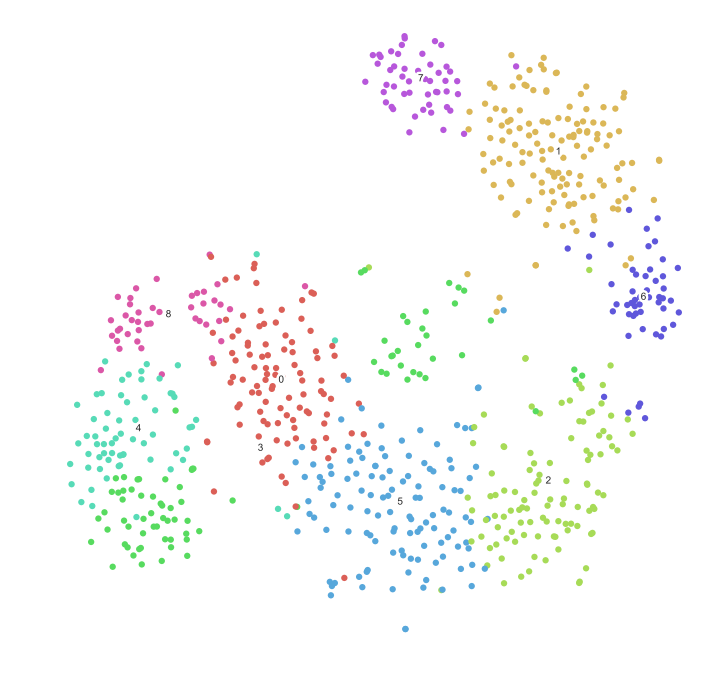

In [22]:
fashion_tsne = TSNE(random_state=123).fit_transform(X)
fashion_scatter(fashion_tsne, kmeans.labels_)

In [23]:
def Print_Cluster(clusters,kmeans_labels):
    
    for i in range(clusters):

        cluster = np.where(kmeans_labels == i)[0]

        n = 0
        N = 0
        if len(cluster) < 5:
            l_N = len(cluster)
        else:
            l_N = 5
            
        print("Cluster ",i)
        for i in Final_Data_Set_Nor.items():
            ID,data = i

            if (n in cluster) and (N <= l_N):
                print(EN_Des[ID]['Description'],"\n")#,data['Revenue'],data['EBITDA'])#data['NDE'],data['TDE'],'\n')#EN_Des[ID]['Description'],"\n")
                N += 1
            elif N > l_N:
                print("\n")
                break
            n += 1

Print_Cluster(9,kmeans.labels_)

Cluster  0
FlexiInternational Software Inc. develops, markets, and supports back office accounting software solutions for companies in banking and credit union, insurance, financial services, and other service industries worldwide. The company offers offers FlexiFinancials suite that consists of FlexiLedger, a core repository of financial transactio 

webMethods, Inc. provides business integration and optimization software. The company markets and sells its products and solutions primarily to the 2,000 corporations worldwide and major government agencies. As of March 31, 2006, the company had approximately 1,400 customers around the world, distributed across its target markets in manufacturing, process industries (such as chemicals, oil and gas, life sciences, metals, paper and plastics), financial services, consumer goods manufacturing and retail, government and telecommunication 

Mustang.com, Inc (Mustang or the Company) is an internet enterprise solutions provider that enhances cus